In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as RMSE

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)

y = pd.Series(data.target, name='target')

print(X.head())
print(y.value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X) 
X_s = scaler.transform(X) 

In [15]:
pd.crosstab(index = y, columns = "counts")

col_0,counts
target,
0,212
1,357


In [ ]:
model = LogisticRegression(penalty = 'l2', max_iter = 3000)
model.fit(X,y)

cv = KFold(n_splits=5, shuffle=True, random_state=49)

# --- 4. Esecuzione della Cross-Validation ---
# : Usiamo F1-score perché l'accuratezza è inutile su dati sbilanciati
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("\n--- Risultati Cross-Validation (5 Folds) ---")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: MSE = {score * 100:.2f}%")

print("-" * 40)
print(f"\n>> Performance Media: {scores.mean() * 100:.2f}%")
print(f">> Stabilità (Deviazione Std): +/- {scores.std() * 100:.2f}%")


--- Risultati Cross-Validation (5 Folds) ---
Fold 1: MSE = 94.74%
Fold 2: MSE = 93.86%
Fold 3: MSE = 96.49%
Fold 4: MSE = 95.61%
Fold 5: MSE = 98.23%
----------------------------------------

>> Performance Media: 95.79%
>> Stabilità (Deviazione Std): +/- 1.50%


c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
model = LogisticRegression(penalty = 'l2', max_iter = 3000)
model.fit(X,y)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=49)

# --- 4. Esecuzione della Cross-Validation ---
# : Usiamo F1-score perché l'accuratezza è inutile su dati sbilanciati
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("\n--- Risultati Cross-Validation (5 Folds) ---")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: MSE = {score * 100:.2f}%")

print("-" * 40)
print(f"\n>> Performance Media: {scores.mean() * 100:.2f}%")
print(f">> Stabilità (Deviazione Std): +/- {scores.std() * 100:.2f}%")



--- Risultati Cross-Validation (5 Folds) ---
Fold 1: MSE = 97.37%
Fold 2: MSE = 96.49%
Fold 3: MSE = 93.86%
Fold 4: MSE = 93.86%
Fold 5: MSE = 95.58%
----------------------------------------

>> Performance Media: 95.43%
>> Stabilità (Deviazione Std): +/- 1.40%


Classification Report:
               precision    recall  f1-score   support

   malignant       0.96      0.93      0.94       212
      benign       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



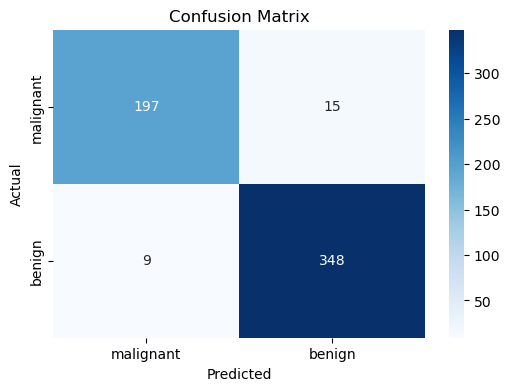

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

#5. Valuta la performance del modello utilizzando il classification_report

y_pred = model.predict(X)

report = classification_report(y, y_pred, target_names=data.target_names)

print("Classification Report:\n", report)


# 6. Visualizza la matrice di confusione

cm = confusion_matrix(y, y_pred)


# Visualizzazione della matrice di confusione

plt.figure(figsize=(6,4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',

            xticklabels=data.target_names,

            yticklabels=data.target_names)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

In [7]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'